# Data Science salaries

## Introduction


 Como personas que estudian Datos, como gente que esta interesada en estudiarla, algo interesante a saber es saber al salario que uno puede aspirar.

Mi objetivo va a radicar estudiar el salario de un DataSience.

## Descripcion de las variables

El dataFrame cuenta de 12 variables distintas:

* **Work_year**: Año del que se toma en cuenta los datos
    * 2020-2024
    
* **Experience level**: Nivel de experiencia de la persona
    * Senior-Middle-Junior & experto
    
* **Employment_type**: Duracion de la jornada laboral
    * Full time, part time, contract, freelance
    
* **Job title**: Titulacion
    * Analytics Engineer, AI Engineer...
    
* **Salary**: Salario en la moneda  local donde trabajaba el trabajador

* **Salary currency**: Es la moneda en la que esta medido el salario
    * Euros (EUR), dolares (USD), Libra esternina (GBP) (Reino Unido)
    
* **Salary in usd**: Salario medido en dolares
    
* **Employee_residence**: Lugar de residencia de cada empleado
    * Estados unidos (Us), España (Es)...

* **Remote radio**: Indica si es un trabajo remoto y cuan remoto es
    * Trabajo totalmente presencial (0),Parcialmente remoto (50), completamente remoto (100)
    
* **Company location**: Localizacion de la empresa
    * apon (JP), Estados Unidos (US), España(ES)
    
* **Company size**: Tamaño de la empresa en funcion a los ingresos y numero de trabajadores
    * S, M, L

In [55]:
stats_summary <- function(df){
    # Estadisticos a tener en cuenta
    cols <- c('Min.', '1st Qu.', 'Median', 'Mean', '3rd Qu.', 'Max.', 'Sd')
    stats_table <- c()
    for (i in 1:ncol(df)){
        # Agregar el estadistico de la desv. estandar
        colstats <- c( as.vector(summary(df[, i])), sd(df[, i]) )
        stats_table <- rbind(stats_table, colstats)
    }
    # Formatear tabla de estadisticos 
    stats_table <- data.frame(stats_table, row.names = colnames(df))
    colnames(stats_table) <- cols
    stats_table <- round(stats_table, 2)
    return(stats_table)
}


box_experience <- function(df)
{
    options(repr.plot.width=20, repr.plot.height=6)
    par(mfrow = c(1, 4))
    for (i in 1:4)
        {
        lvl<- unique(experience_level)[i]
        boxplot(df[df$experience_level == lvl, 7])
        title(paste0('Nivel ', lvl))
        }    
}

box_experience_esp <- function(df)
{
    options(repr.plot.width=20, repr.plot.height=6)
    par(mfrow = c(1, 4))
    for (i in 1:4)
        {
        lvl<- unique(experience_level)[i]
        boxplot(df[df$experience_level == lvl, 5])
        title(paste0('Nivel ', lvl))
        }    
}

In [2]:
#Cargar los datos
df <- read.csv('DataScience_salaries_2024.csv')
head(df)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
2,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
3,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
4,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
5,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
6,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S


## Analisis 

In [3]:
df.comp <- df

In [4]:
attach(df.comp)

In [5]:
head(df.comp)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
2,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
3,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
4,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
5,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L
6,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S


### Variables categoricas

[1] "2020(0.505%)"  "2021(1.469%)"  "2022(11.134%)" "2023(57.413%)"
[5] "2024(29.478%)"

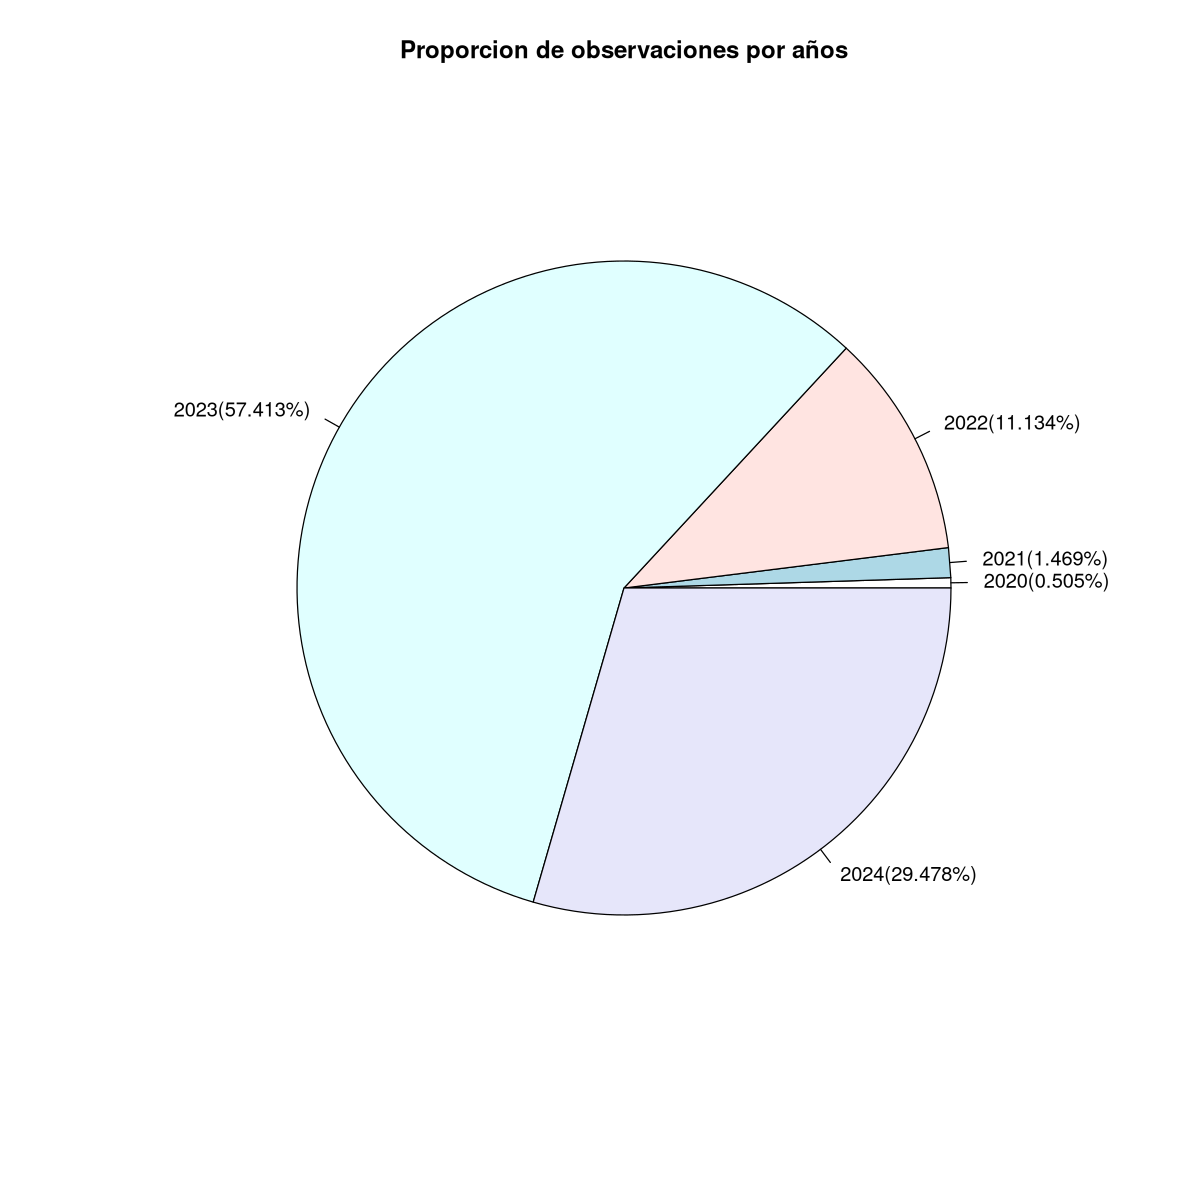

In [6]:
#Primero calculamos la proporcion del nivel de la variable categorica
options(repr.plot.width=10, repr.plot.height=10)
prop <- round(table(work_year)/length(work_year), 5)

labels <- c()
for (i in 1:length(unique(work_year))) {
    labels <- c(labels, paste0( names(prop)[i], '(', prop[i]*100, '%)') )
    }
labels
pie(table(work_year), labels = labels, radius = 0.75, main = 'Proporcion de observaciones por años')
   

Vemos que, a diferencia de lo que se podia pensar, tenemos mas datos de los años mas recientes que de años pasados:

* Puede ser **positivo** porque:
    * **Nos centramos en un contexto actual**, ya que la mayoria de los datos son de este año y el anterior. Los salarios puede cambiar rapidamente y nos podemos centrar en los tiempos actuales, dejando detras datos pre pandemia, por ejemplo.
    * **Precision**, ya que vemos una vision real de lo que pagan las empresas a dia de hoy
    * **Relevancia inmediata**, ya que, en cierta medida, queremos saber cuando podemos llegar a cobrar, no a cuanto podriamos haber aspirado 
    
    
.
    
    
* Por otro lado, puede llegar a ser incluso mas **negativo**:
    * **Falta de perspectiva historica**. Por mucho que nos queramos centrar a dia de hoy, la abundancia de datos no esta mal, y es bueno saber como se ha comportado. 
    * **No se pueden capturar patrones**, no dejamos de ser analistas de datos, y, aunque haya cambiado todo en estos años, puede ser debido a algun patro o comportamiento. La privacion de datos de años pasados nos impide de alguna manera intetar predecir comos seran los datos tras pasar algun evento o pasar un cierto tiempo.

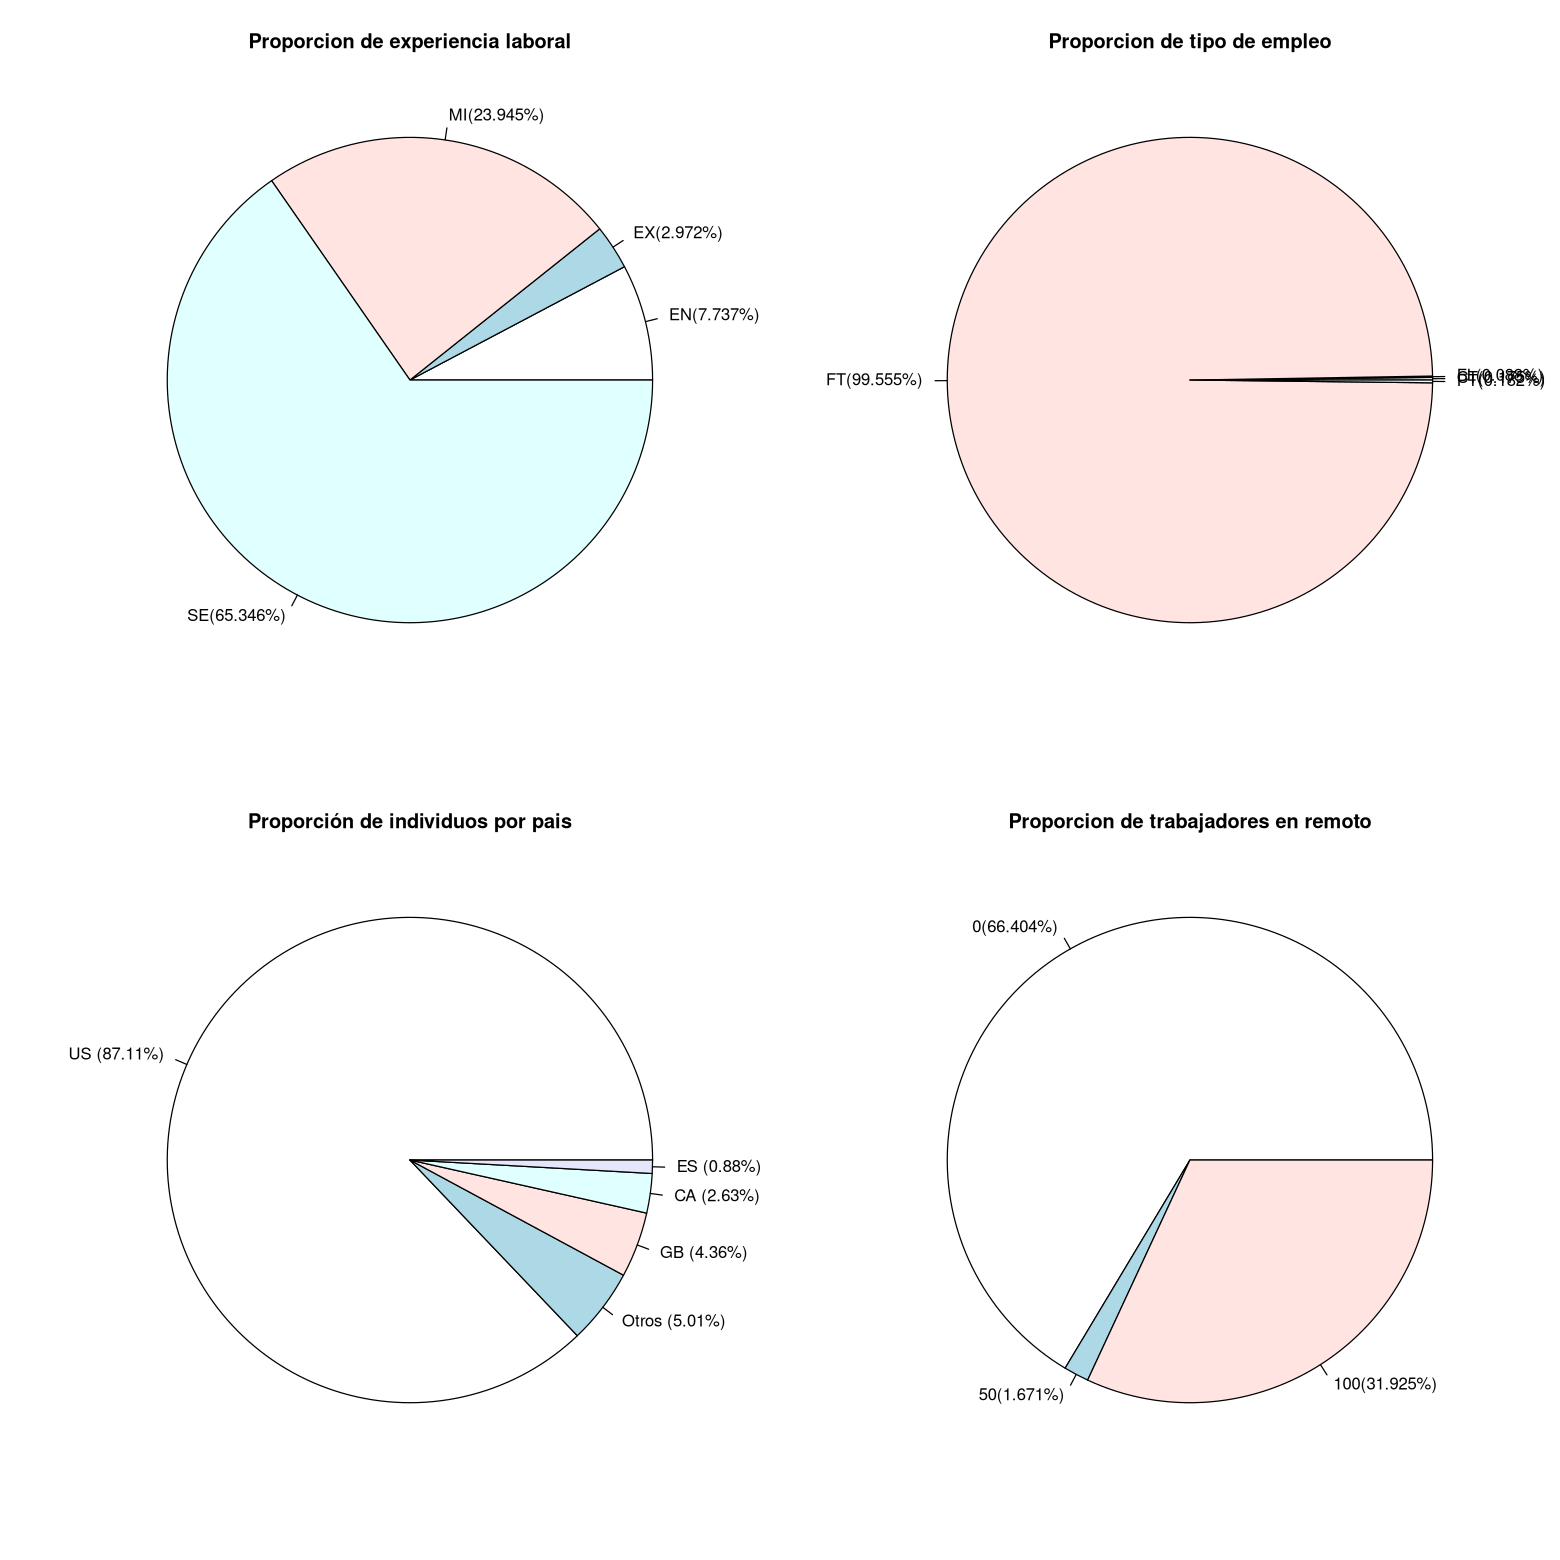

In [7]:
options(repr.plot.width=13, repr.plot.height=13)
par(mfrow=c(2, 2))
emp.names <- c('experience_level', 'employment_typem', 'employee_residence', 'remote_ratio')
names_esp <- c('experiencia laboral', 'tipo de empleo',  'individuos por pais', 'trabajadores en remoto')

var <- c(2, 3, 8, 9)

for (i in 1:4) {

    #Creacion 3 grafico
    if (i == 3)
{
        
        prop <- round(sort(table(employee_residence))/length(employee_residence), 5)
        prop <- sort(prop, decreasing = T)

        pacum <- cumsum(prop)
        for (i in seq_along(pacum)){
        if (pacum[i]>=0.95){
        p_aux <- i  
        break
        }
    }

        top_prop <- prop[1:(p_aux - 1)]  
        otros_prop <- sum(prop[p_aux:length(prop)])  
        top_prop["Otros"] <- otros_prop  

        top_prop <- sort(top_prop, decreasing = TRUE)

        labels_top <- paste0(names(top_prop), " (", round(top_prop * 100, 2), "%)")

        pie(top_prop, labels = labels_top, radius = 1, main = "Proporción de individuos por pais")

}
    
    #Creacion del resto
    else
    {
    
    k <- df.comp[ , var[i]]

    prop <- round(table(k)/length(k), 5)

    labels <- c()
    for (j in 1:length(unique(k))) 
    {
        labels <- c(labels, paste0( names(prop)[j], '(', prop[j]*100, '%)') )
    }

    pie(table(k), labels = labels, radius = 1, main = paste0('Proporcion de ', names_esp[i]))
        
    }
}


Podemos ver que en todos hay 1 o 2 valores que predominan claramente:

* Vemos que casi todos, por no decir todos, los individuos de la muestra tienen un trabajo a tiempo completo, mas del 99%, y casi todos los empleados son Estadounidenses, cerca del 90%. Exceptuando estadounidenses, destacan los britanicaos y canadienses, completando el 93% de la muestra.
* A la hora de ver la experiencia de los individuos, se ve que cuanta mayor es la experiencia, mas puestos abarcan. Al contrario, a la hora de ver puestos en remoto, no vemos que cuanto menos tiempo presencial haya menos individuos hay: en general, o tienen un trabajo presencial o uno remoto, no hay apenas individuos con uno parcial.

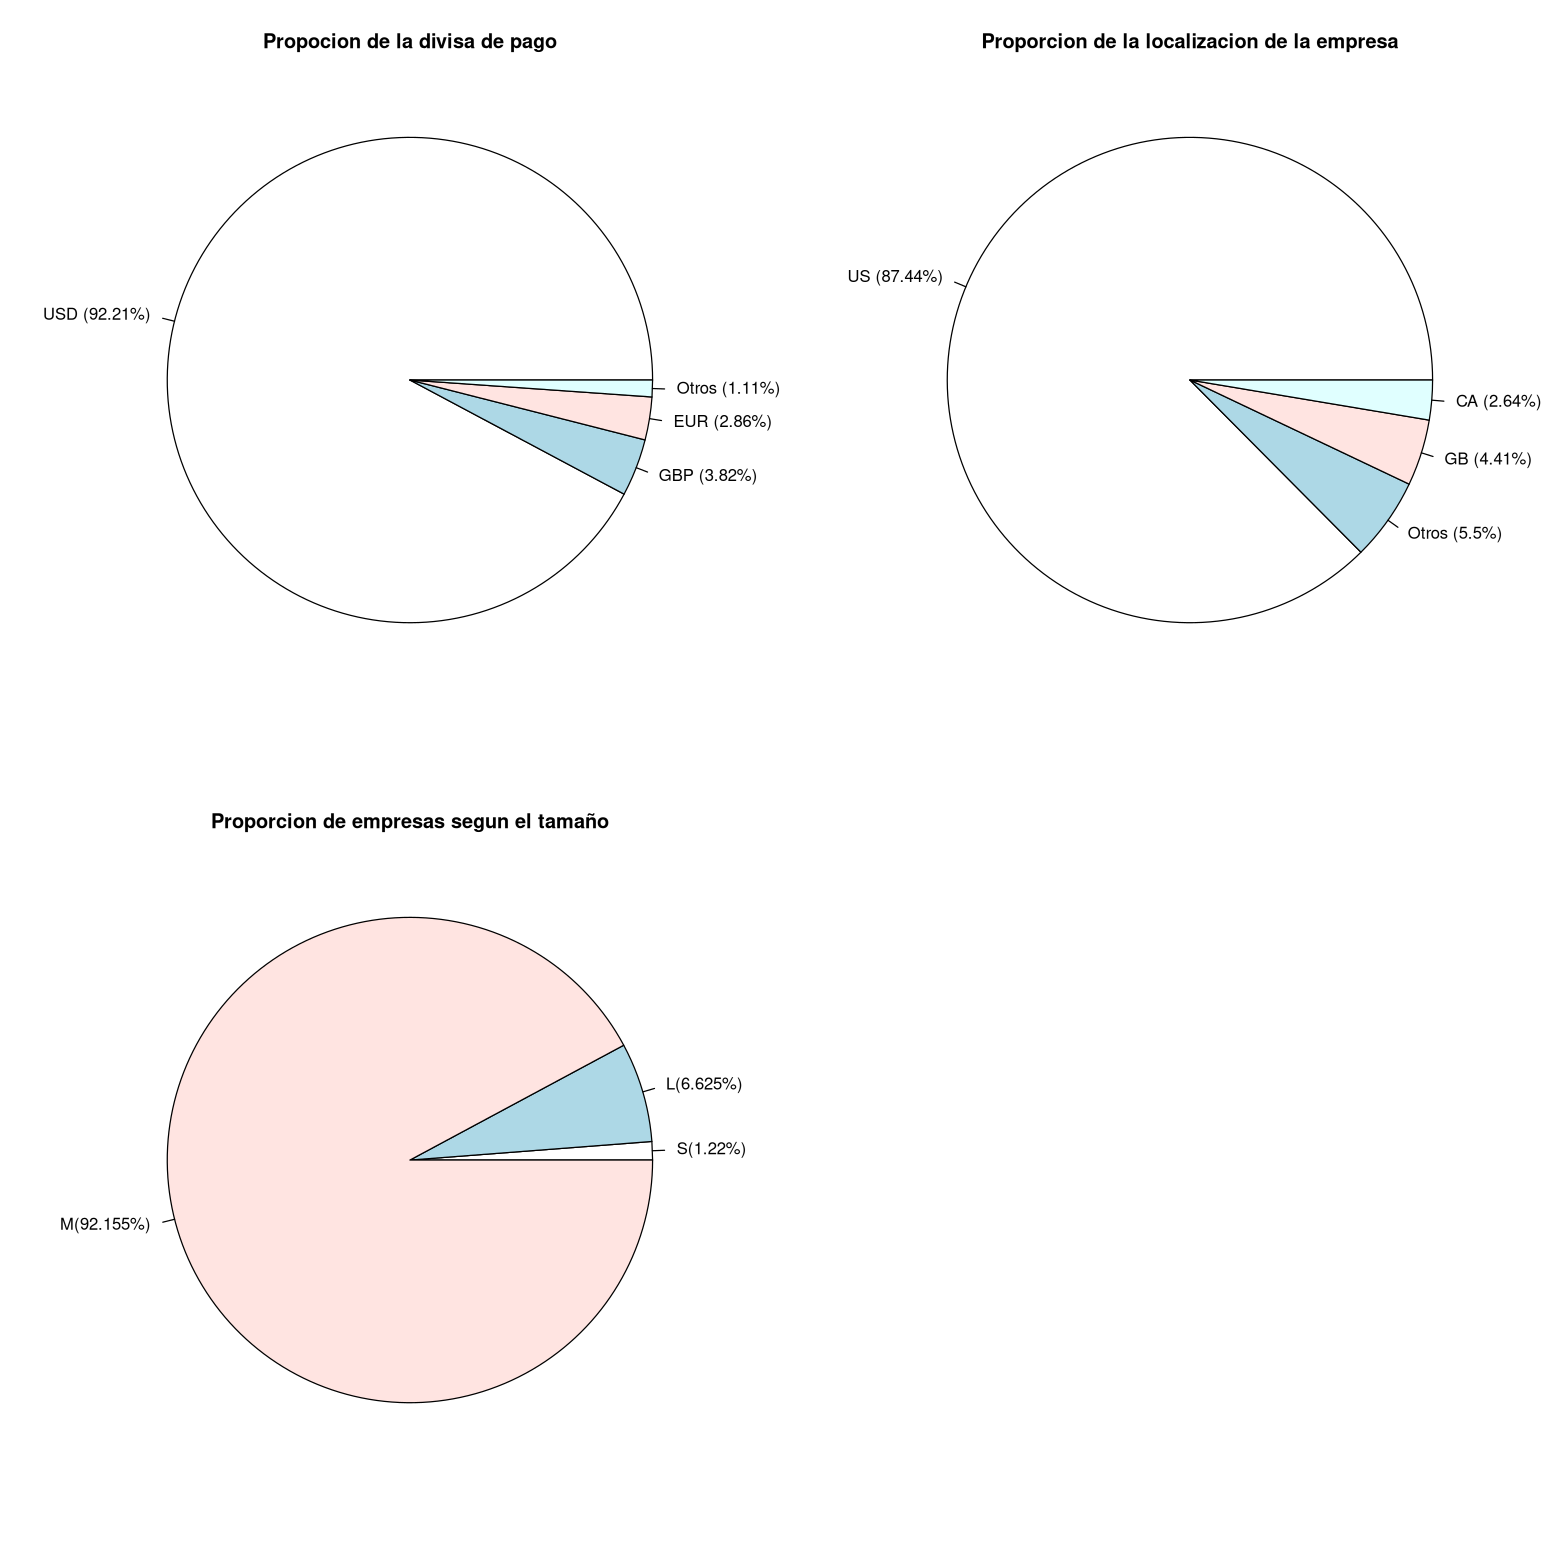

In [21]:
par(mfrow=c(2, 2))
options(repr.plot.width=13, repr.plot.height=13)

for (i in 1:3){
#Dos primeros graficos, definicion de variables
if (i == 1){var.inv <- salary_currency; significative.factor<-0.99; main.text <- 'Propocion de la divisa de pago'}
else if (i == 2){var.inv <- company_location; significative.factor <- 0.99999;main.text <- 'Proporcion de la localizacion de la empresa'}
#Ultimo grafico (No necesita apartado otros)
else{
    prop <- round(sort(table(company_size))/length(company_size), 5)

labels <- c()
for (j in 1:length(unique(company_size))) {
    labels <- c(labels, paste0( names(prop)[j], '(', prop[j]*100, '%)') )
    }

pie(sort(table(company_size)), labels = labels, radius =1, main = paste0('Proporcion de empresas segun el tamaño'))

    break
}
    
#Creacion de los dos primeros graficos
prop <- round(sort(table(var.inv))/length(var.inv), 5)
prop <- sort(prop, decreasing = T)

pacum <- cumsum(prop)
for (i in seq_along(pacum)){
    if (pacum[i]>=significative.factor){
        p_aux <- i  
        break
        }
    }
                           

top_prop <- prop[1:(p_aux - 1)]  
otros_prop <- sum(prop[p_aux:length(prop)])  
top_prop["Otros"] <- otros_prop  

top_prop <- sort(top_prop, decreasing = TRUE)

labels_top <- paste0(names(top_prop), " (", round(top_prop * 100, 2), "%)")

pie(top_prop, labels = labels_top, radius = 1, main = main.text)
}




* Como era de esperar, la mayoria de empresas y meodos de pago son estadounidenses. 
Revisando las empresas, vemos que casi la totalidad de las empresas son medianas, lo que si nos esperabamos era una muy proporcion de empresas pequeñas, debido a la limitacion de recursos y el poco volumnen de datos.


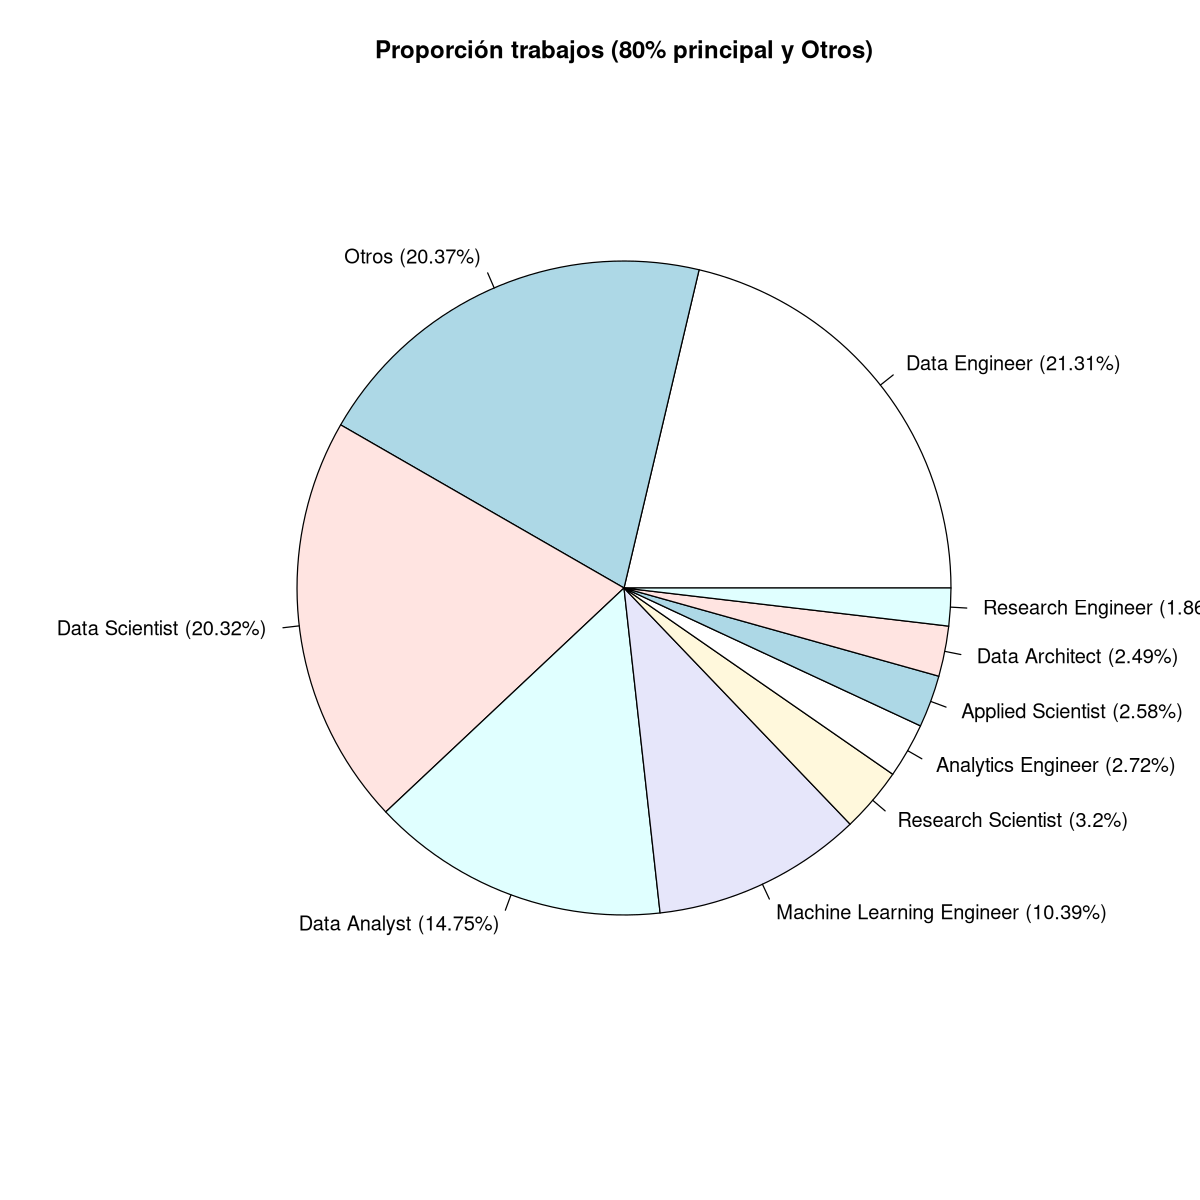

In [9]:
prop <- round(sort(table(job_title))/length(job_title), 5)
prop <- sort(prop, decreasing = T)

pacum <- cumsum(prop)
for (i in seq_along(pacum)){
    if (pacum[i]>=0.80){
        p_aux <- i  
        break
        }
    }
                           

top_prop <- prop[1:(p_aux - 1)]  
otros_prop <- sum(prop[p_aux:length(prop)])  
top_prop["Otros"] <- otros_prop  

top_prop <- sort(top_prop, decreasing = TRUE)

labels_top <- paste0(names(top_prop), " (", round(top_prop * 100, 2), "%)")

options(repr.plot.width = 10, repr.plot.height = 10)
pie(top_prop, labels = labels_top, radius = 0.75, main = "Proporción trabajos (80% principal y Otros)")



Podemos ver que de los 153 empleos distintos destacan 4 por encima de todo: Data Engineer, Data Scientist, Data Analyst y Machine Learning. 
Cabe aclarar que otros son los 144 empleos distintos con probabilidad menor que Research Engineer, por lo que no son relevantes.

De aqui podemos ver cuales son los empleos mas demandados en estos ultimos años.

## Analisis del salario

Primero de todo, no podemos comparar la fila salario, ya que esta en distintas uniades, por ello usaremos la variable salary_usd.


Para un primer vistazo, clasificaremos segun la variable experience_level, ya que, suponemos que a mayor nivel experiencia, mayor sueldo va a tener.

In [10]:

df.se <- df.comp[df.comp$experience_level == 'SE', ]
df.mi <- df.comp[df.comp$experience_level == 'MI', ]
df.ex <- df.comp[df.comp$experience_level == 'EX', ]
df.en <- df.comp[df.comp$experience_level == 'EN', ]

Vamos a comprobar como varian entre ellos los salarios:

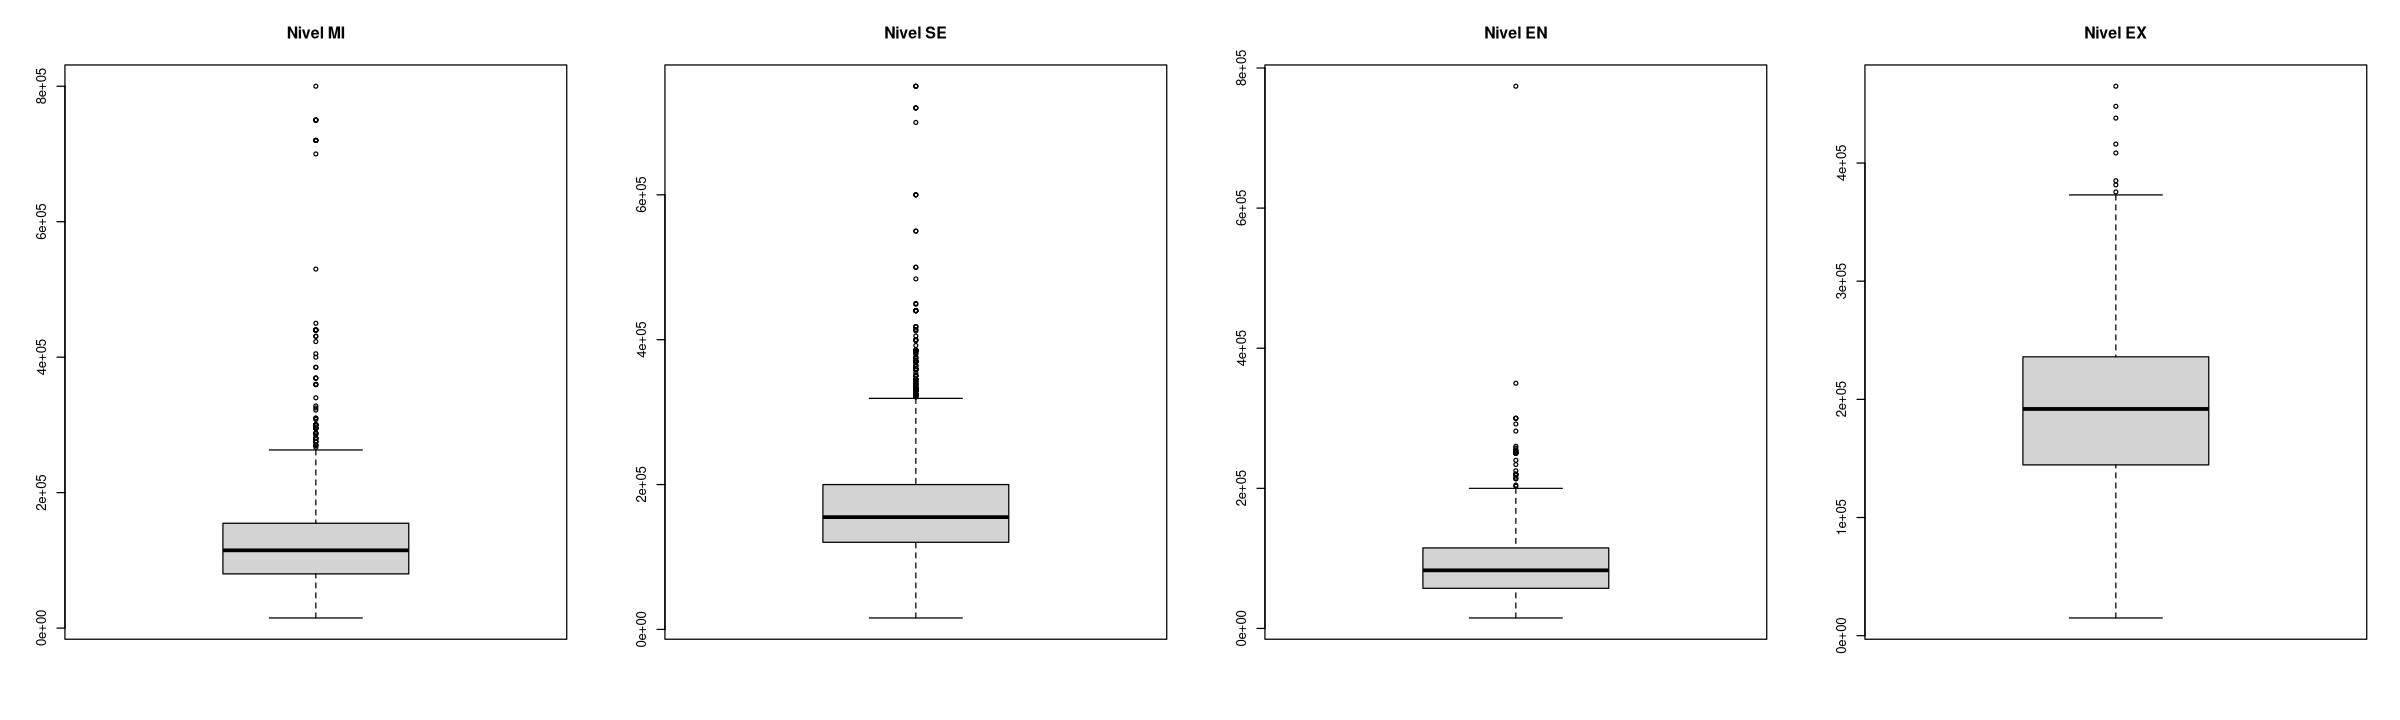

In [28]:
box_experience(df.comp)

Nos podemos encontrar una gran cantidad de datos atipicos. Esto puede llegar a resultar normal, si nos gijamos, el nivel que mas cantidad de atipicos presenta es SE, ya que son los mas formados y es normal que haya gente que gane mucho mas de lo normal.

Vamos a buscar analizar los salarios pagados en euros de empresas españolas.

In [12]:
salarios_ESP <- df.comp[ df.comp$employee_residence == 'ES'& df.comp$salary_currency == 'EUR' & df.comp$company_location =='ES',  ] 
head(salarios_ESP)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
9201,2024,MI,FT,Machine Learning Engineer,125800,EUR,139777,ES,100,ES,M
11621,2024,EX,FT,Data Science Director,96000,EUR,106666,ES,100,ES,L
11622,2024,EX,FT,Data Science Director,96000,EUR,106666,ES,100,ES,L
12413,2023,SE,FT,Principal Data Engineer,85000,EUR,91773,ES,100,ES,M
12511,2024,MI,FT,Machine Learning Engineer,83900,EUR,93222,ES,100,ES,M
12784,2023,SE,FT,Principal Data Scientist,80000,EUR,86374,ES,100,ES,L


Primero, trabajaremos con los salarios de empresas ubicadas en españa, con salario en euros y empleados españoles. Si quitamos la condicion de que los trabajadores sean españoles no varia apenas el numero de observaciones, por eso dejamos solo a los españoles.
Cabe resaltar, que las personas con residencia en españa forman el 0.88% del total (de los datos del dataframe), por lo que en este analisis analizamos menos del 1% del de la muestra.


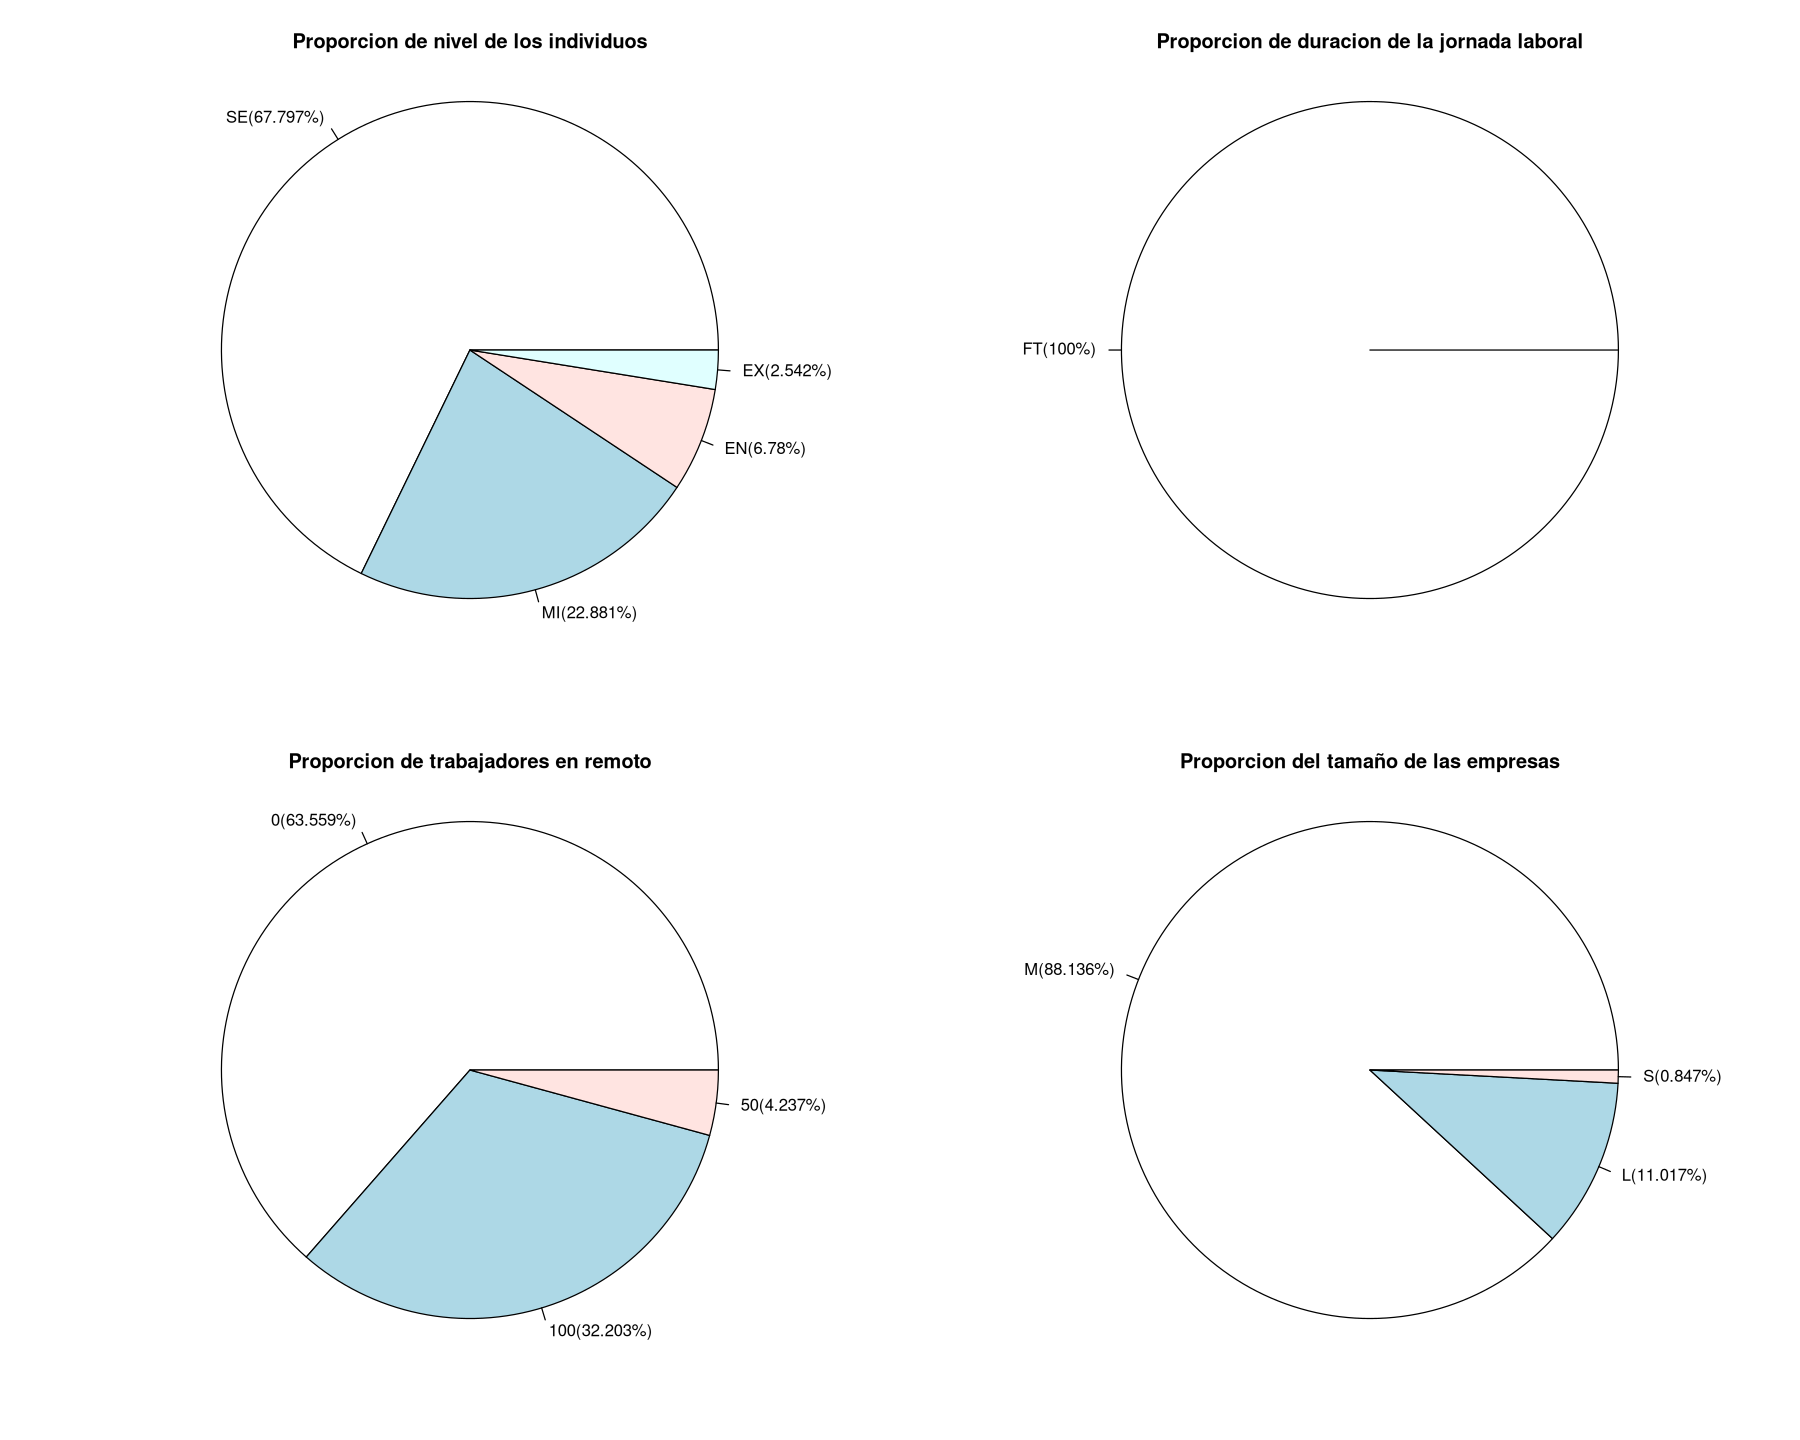

In [46]:
options(repr.plot.width=15, repr.plot.height=12)
par(mfrow = c(2, 2))
for (j in c(2, 3, 9, 11)){

filte.aux.value <- sort(table(salarios_ESP[, j]), decreasing = T)

prop <- round(filte.aux.value/nrow(salarios_ESP), 5)
labels <- c()

for (i in 1:length(unique(salarios_ESP[, j]))) 
    {
    labels <- c(labels, paste0(names(prop)[i], '(', prop[i]*100, '%)') )
    }

if (j==2){main.aux <- 'Proporcion de nivel de los individuos'}
else if(j==3){main.aux <-'Proporcion de duracion de la jornada laboral'}
else if (j==9){main.aux <-'Proporcion de trabajadores en remoto'}
else{main.aux <-'Proporcion del tamaño de las empresas'}
    
pie(filte.aux.value, labels = labels, radius = 1, main = main.aux)
}

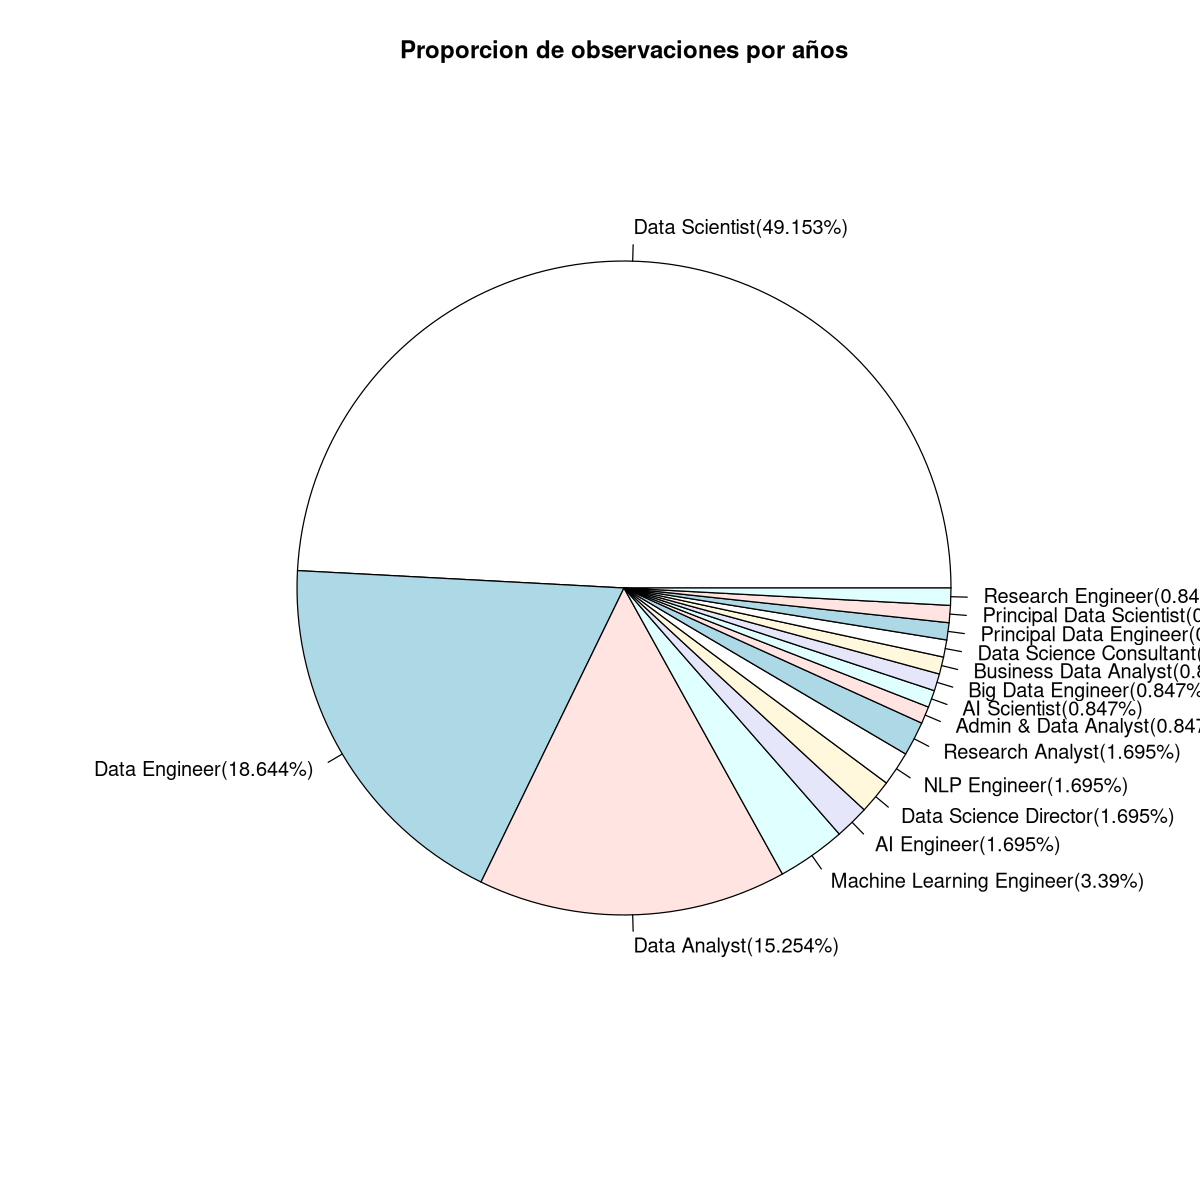

In [52]:
filte.aux.value <- sort(table(salarios_ESP[, 4]), decreasing = T)

prop <- round(filte.aux.value/nrow(salarios_ESP), 5)
labels <- c()

for (i in 1:length(unique(salarios_ESP[, 4]))) 
    {
    labels <- c(labels, paste0( names(prop)[i], '(', prop[i]*100, '%)') )
    }

options(repr.plot.width=10, repr.plot.height=10)
pie(filte.aux.value, labels = labels, radius = 0.75, main = 'Proporcion de observaciones por años')
   

Podemos ver como entre las enmpresas españolas, la profesion mas demnadada es la de cientifico de datos, pero tambien destacan los ingenieros de datos y los analistas de datos, que van fuertemente de la mano, segido de ingeniero en machine learning.

No es casualidad que sea un refrejo del conjunto completo de datos, ya que, aunque las proporciones varian debido a la diferencia del numero de trabajos distintos, se ve como las mas demandas son estas cuatro.


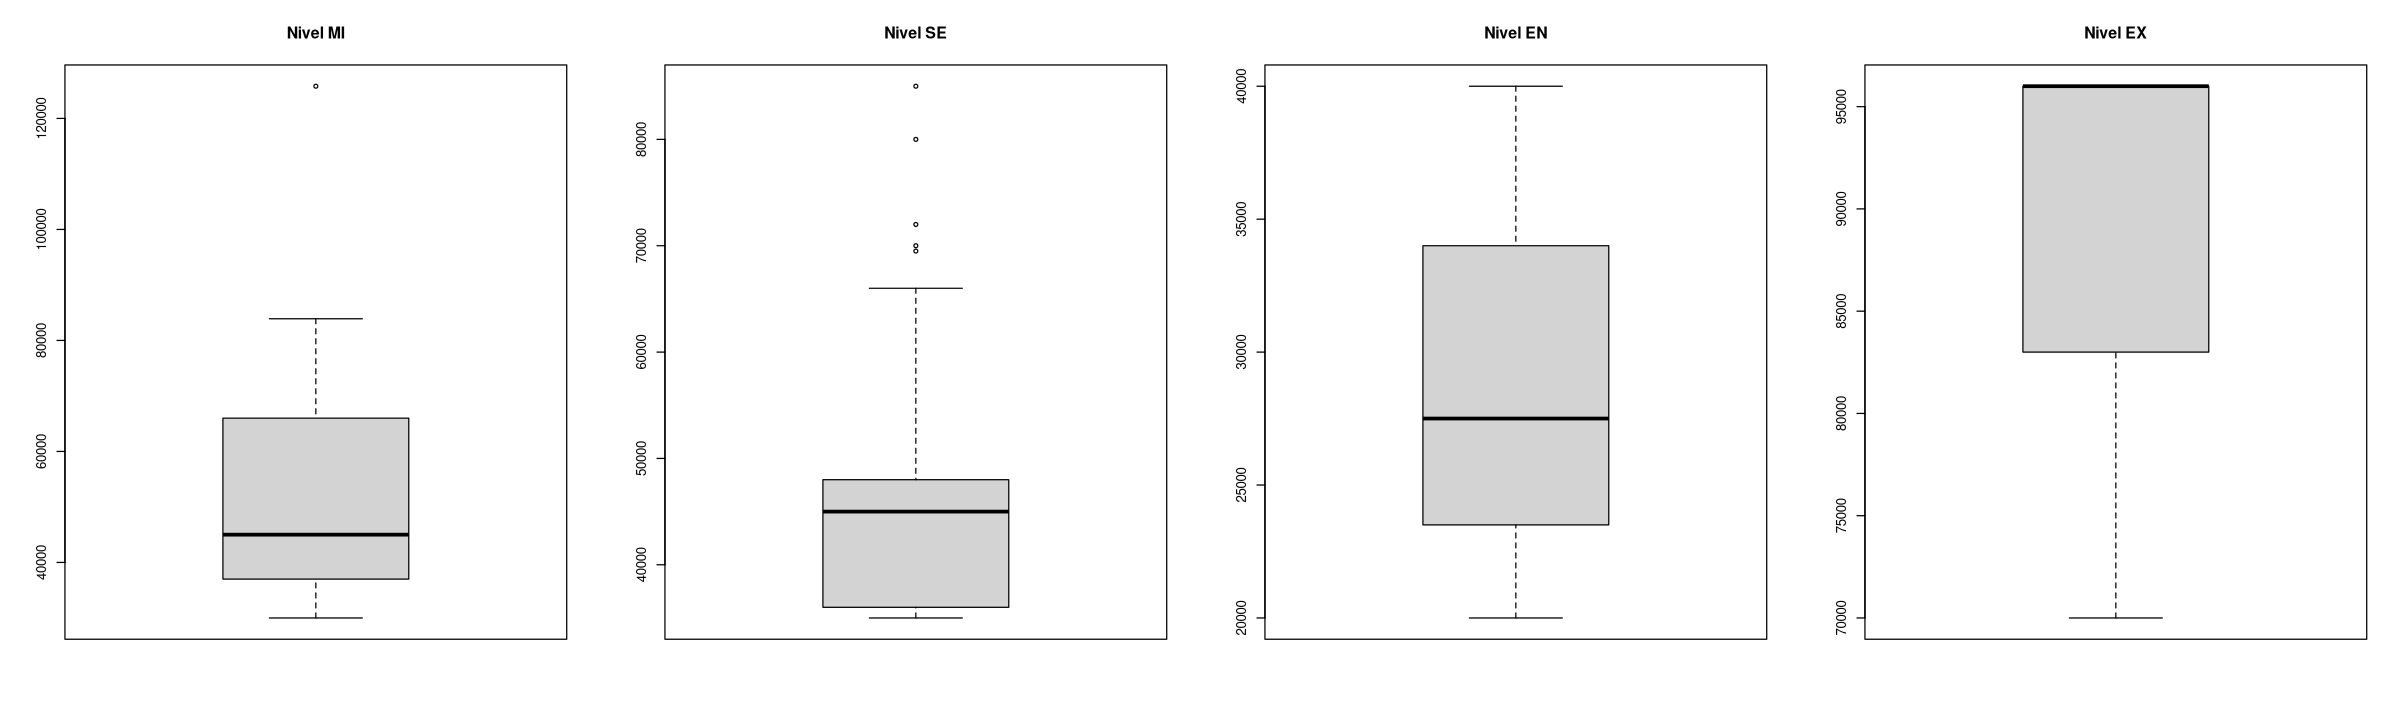

In [29]:
box_experience_esp(salarios_ESP)

Aqui nos encontramos varias cosas que nos llaman la atencion:

* No hay tanta presencia de datos atipicos, aun asi, como esperabamos, hay mas atipicos segun aumenta la experiencia de la persona, y, son siempre atipicos superiores a la media. 
* A contradiccion de lo anterior, en la grafica de los expertos deberia de haber muchos atipicos. No los hay debido a la falta de datos en la muestra, habiendo solo 3 individuos que cumplen estas condiciones
* Cabe destacar que la media y la mediana difieren significativamente en casi todas las graficas. Esto se puede deber a la aparicion de atipicos

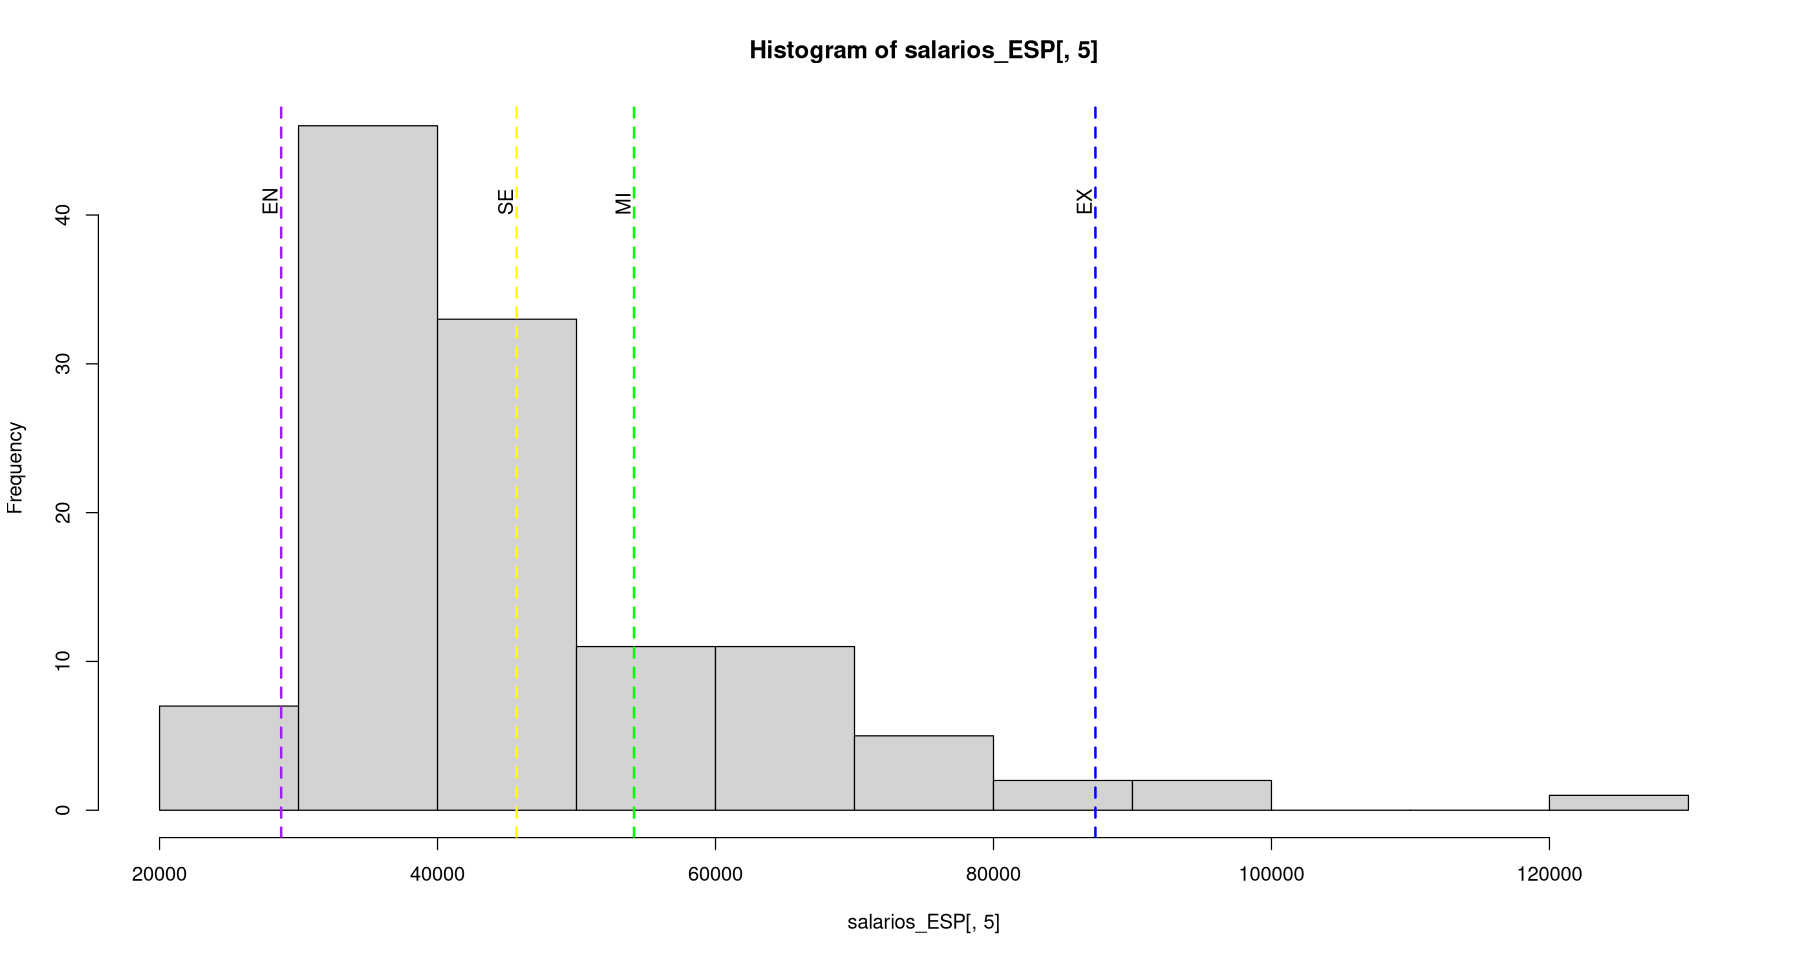

In [35]:
options(repr.plot.width=15, repr.plot.height=8)
hist(salarios_ESP[, 5])

for (i in 1:4){
    mean_exp <- mean(salarios_ESP[salarios_ESP$experience_level == unique(salarios_ESP$experience_level)[i], 5])
    abline(v = mean_exp, col = color_exp[i], lwd = 2, lty = 2)
    
     text(x = mean_exp-800, 
         y = 40,  # Coloca el texto justo sobre el borde inferior
         labels = unique(salarios_ESP$experience_level)[i], 
         col = 'black', cex = 1, srt = 90, adj = 0)
    }

Aqui nos llama la atencion una cosa muy clara: como en promedio tiene mayor salario un empleado con un nivel de experiencia MI (mid level) a uno con SE (senior level), teniendo este ultimo mas experiencia.

Por el resto, era de esperar que los EN (entry level) sean los que menos salario tienen, y los EX (experience level) sean los que mas salario tengan.

Tambien podemos ver que la gran mayoria de salarios estan concentraos entre los 30k-50k euros anuales (2500-4100 euros mensuales). 

Para hacerlo mas interesante, podemos ver que distribucion sigue cada uno de los salarios en funcion del nivel de experiencia

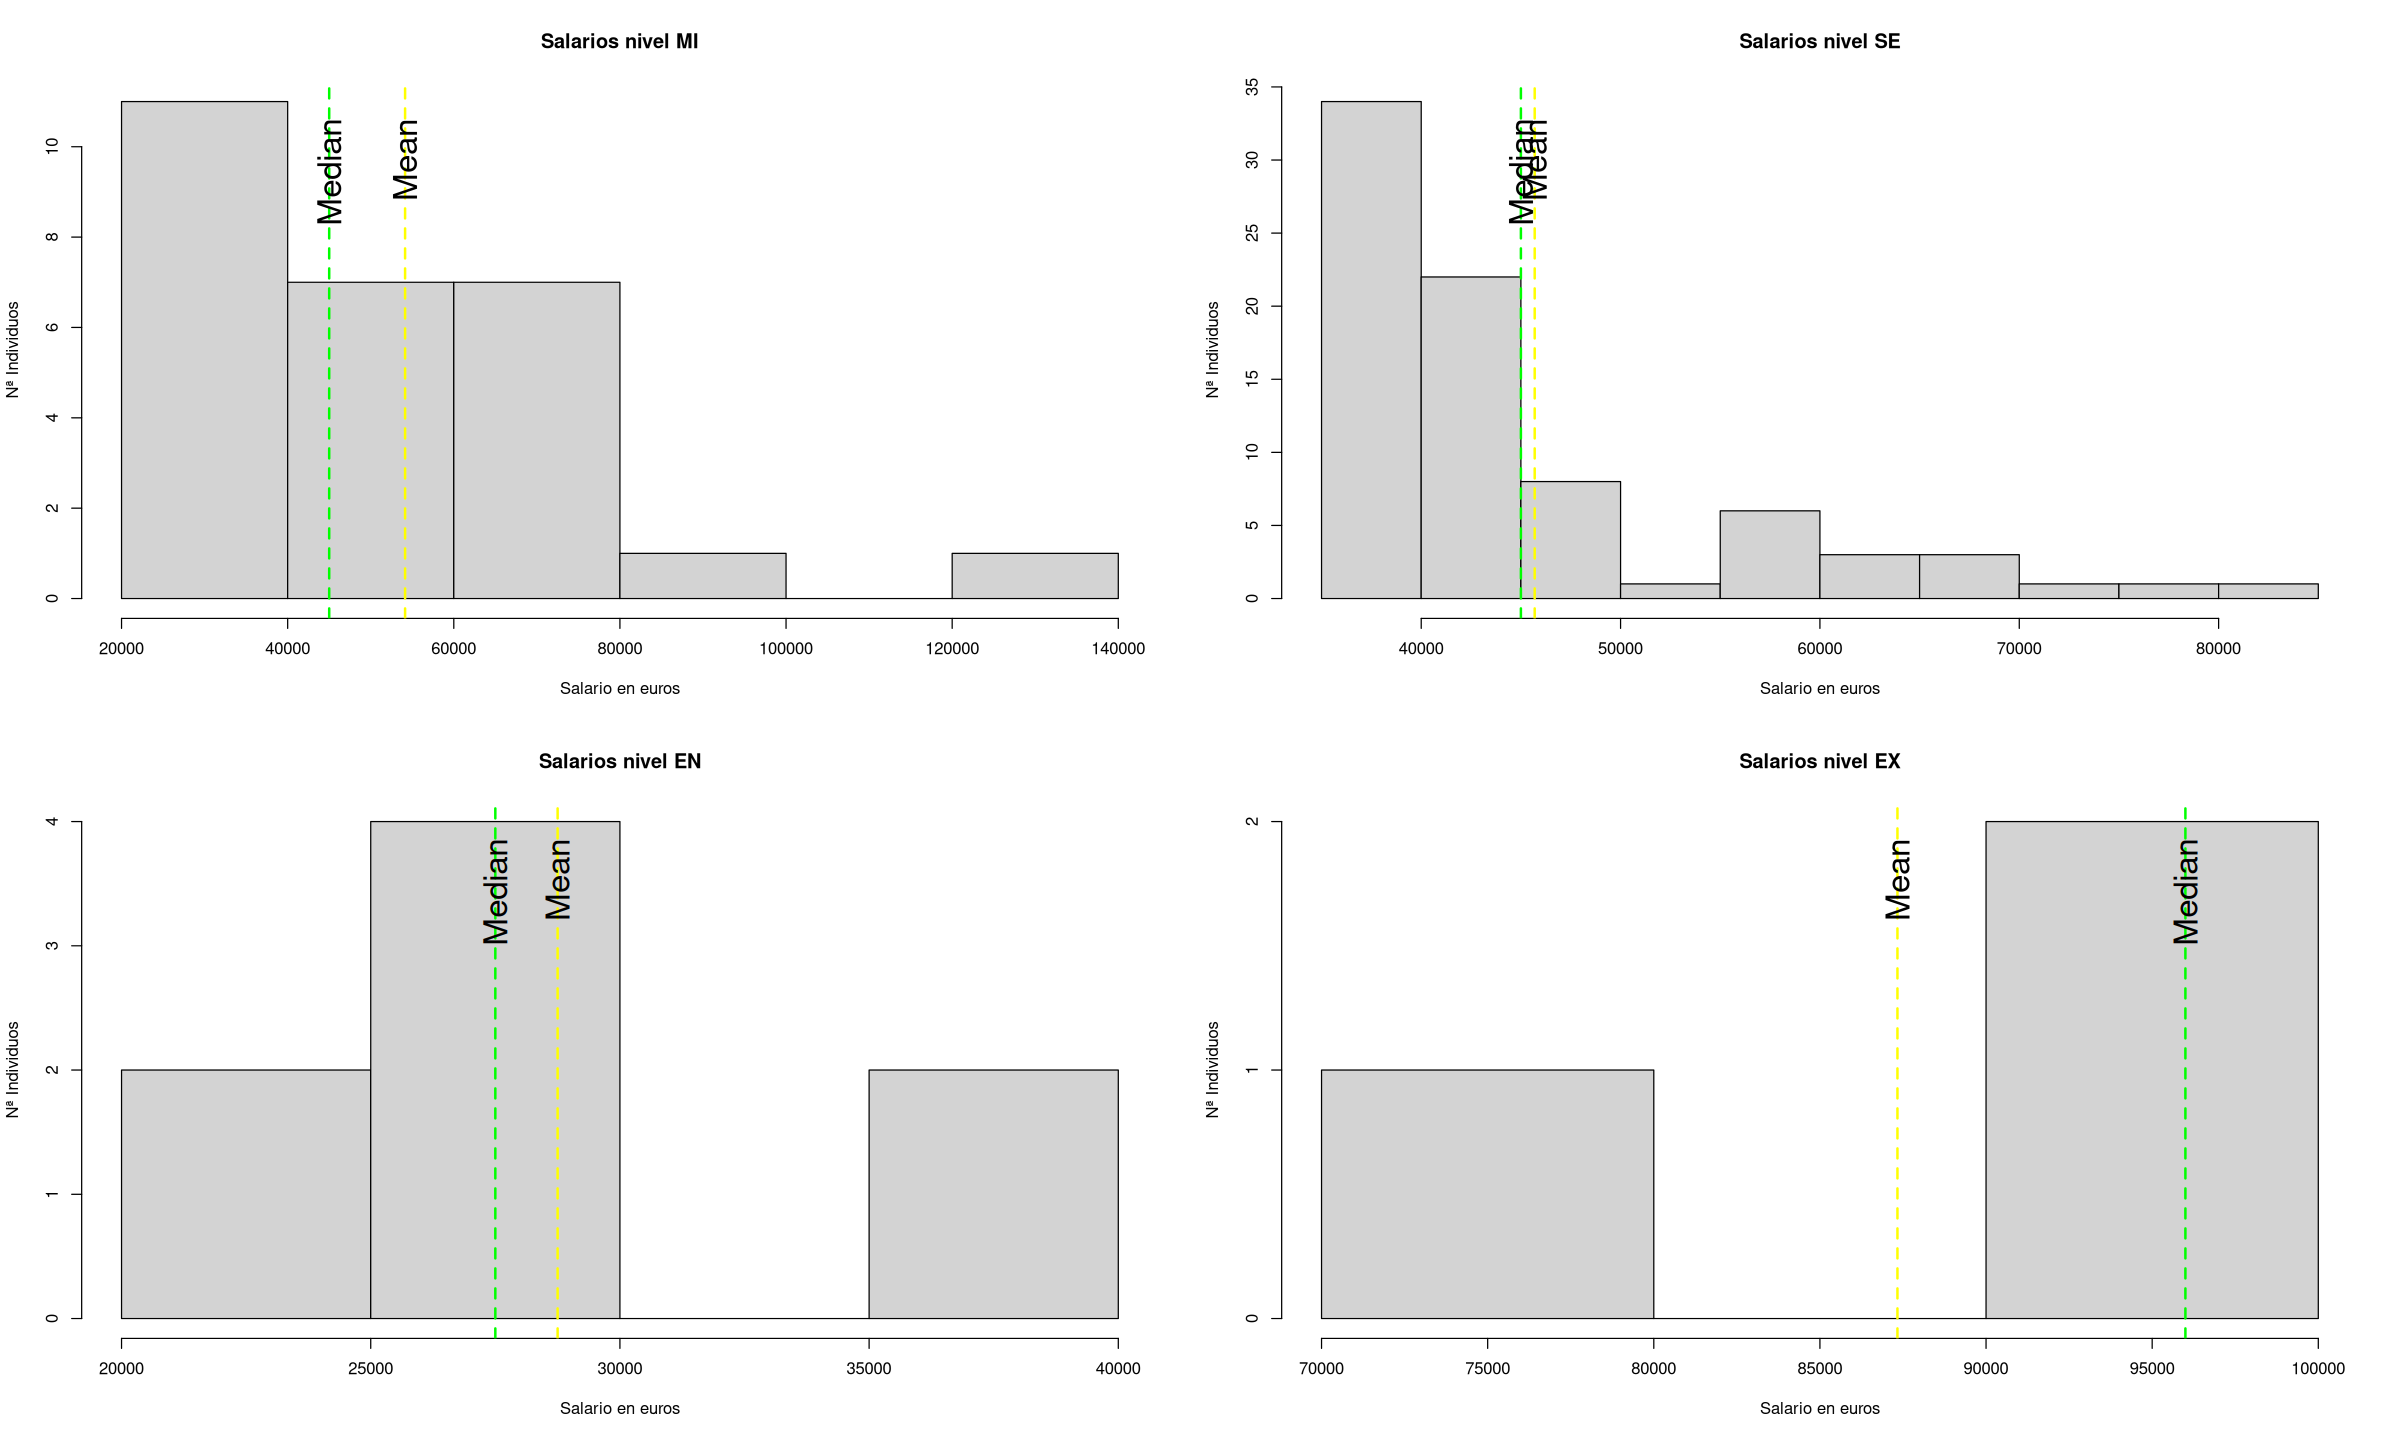

In [24]:
par(mfrow = c(2, 2))
options(repr.plot.width=20, repr.plot.height=12)

for (i in 1:4){
    
    filted.salary.es <- salarios_ESP[salarios_ESP$experience_level == unique(experience_level)[i], 5]
    mean.filted.salary.es <- mean(filted.salary.es)
    median.filted.salary.es <- median(filted.salary.es)
    
    histograma <- hist(filted.salary.es, main = paste0('Salarios nivel ', unique(experience_level)[i]), ylab = 'Nª Individuos', xlab = 'Salario en euros')
    max_y <- max(histograma$counts)

    
    abline(v = mean.filted.salary.es, col = 'yellow', lwd = 2, lty = 2)
    text(x = mean.filted.salary.es, y =max_y*0.8, col = 'black', cex = 2, srt = 90, adj = 0, labels = 'Mean', )
    abline(v = median.filted.salary.es, col = 'green', lwd = 2, lty = 2)
    text(x = median.filted.salary.es, y =max_y*0.75, col = 'black', cex = 2, srt = 90, adj = 0, labels = 'Median', )

    }


Era evidente que la media y la mediana iba a diferir bastante en lso nivel EX y EN debido a la ausencia de datos. Sin embargo, en un primer momento puede sormprender que difiera asi en los MI. Se entiende al ver que los MI presenta valores atipicos.

Sorprendente, dentro de los SE, la media y la mediana estan bastante jutnas, y se peude observar bien una curva, donde la mayoria de personas tiene un salario entre los 35-45k anuales.




A la hora de analizar no nos tenemos que quedar unicamente con la diferencia de nivel, podemos ver como varia el salario en funcion de muchas cosas.



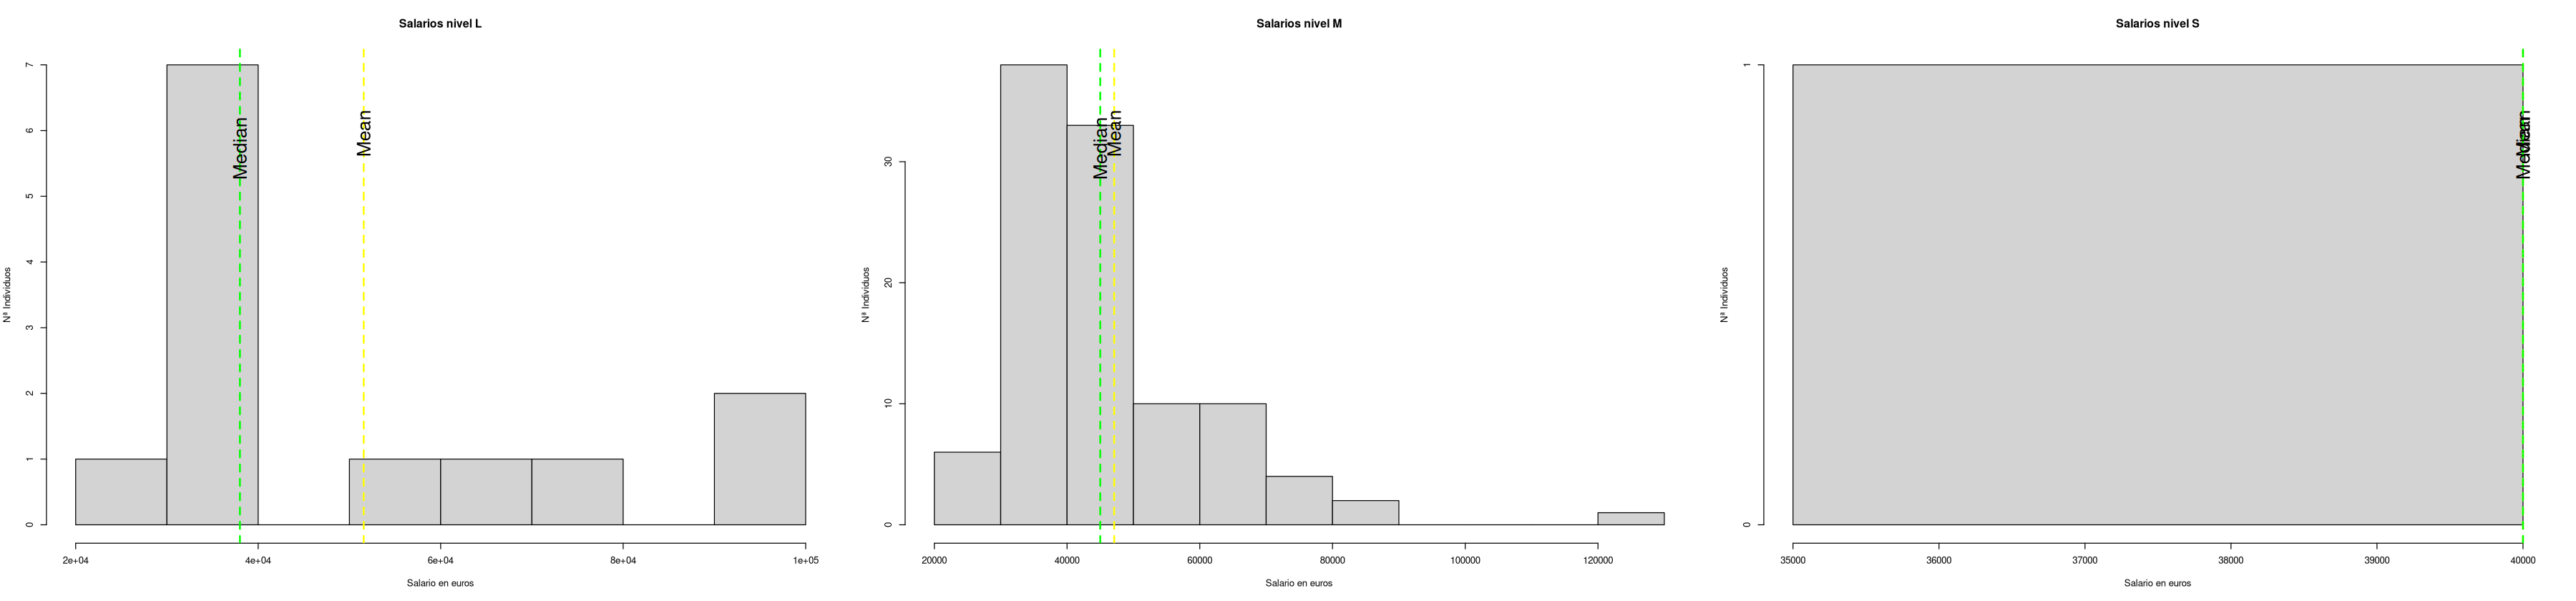

In [60]:
par(mfrow = c(1, 3))
options(repr.plot.width=30, repr.plot.height=7)

for (i in c(1, 3, 2)){
    
    filted.salary.es <- salarios_ESP[salarios_ESP$company_size == unique(company_size)[i], 5]
    mean.filted.salary.es <- mean(filted.salary.es)
    median.filted.salary.es <- median(filted.salary.es)
    
    histograma <- hist(filted.salary.es, main = paste0('Salarios nivel ', unique(company_size)[i]), ylab = 'Nª Individuos', xlab = 'Salario en euros')
    max_y <- max(histograma$counts)

    
    abline(v = mean.filted.salary.es, col = 'yellow', lwd = 2, lty = 2)
    text(x = mean.filted.salary.es, y =max_y*0.8, col = 'black', cex = 2, srt = 90, adj = 0, labels = 'Mean', )
    abline(v = median.filted.salary.es, col = 'green', lwd = 2, lty = 2)
    text(x = median.filted.salary.es, y =max_y*0.75, col = 'black', cex = 2, srt = 90, adj = 0, labels = 'Median', )

    }


Por ejemplo, como varia en funcion del temaño de la empresa:

Vemos que lo que se mostraba en grafico de toda la muestra, otra vez se plasma aqui: Hay una gran cantidad de empresas medianas pero muy pocas empresas grandes y pequeñas.
Tan solo tenemos un dato de las empresas pequeñas, por lo que no la vamos a tener en consideracion, lo que si vamos a analizar son las empresas medianas y grandes:

* Podemos ver que dentro de las empresas grandes, la media y la mediana difieren significativamente. Podemos observar que la mayoria de los salarios en estas empresas oscilan entre los 30-40k anuales, pudiendo llegar hasta los 100k.

* Por otro lado, en las empresas medianas, donde tenemos muchos mas datos podemos ver que la media y la mediana estan muy juntas, cerca de los 50k euros.


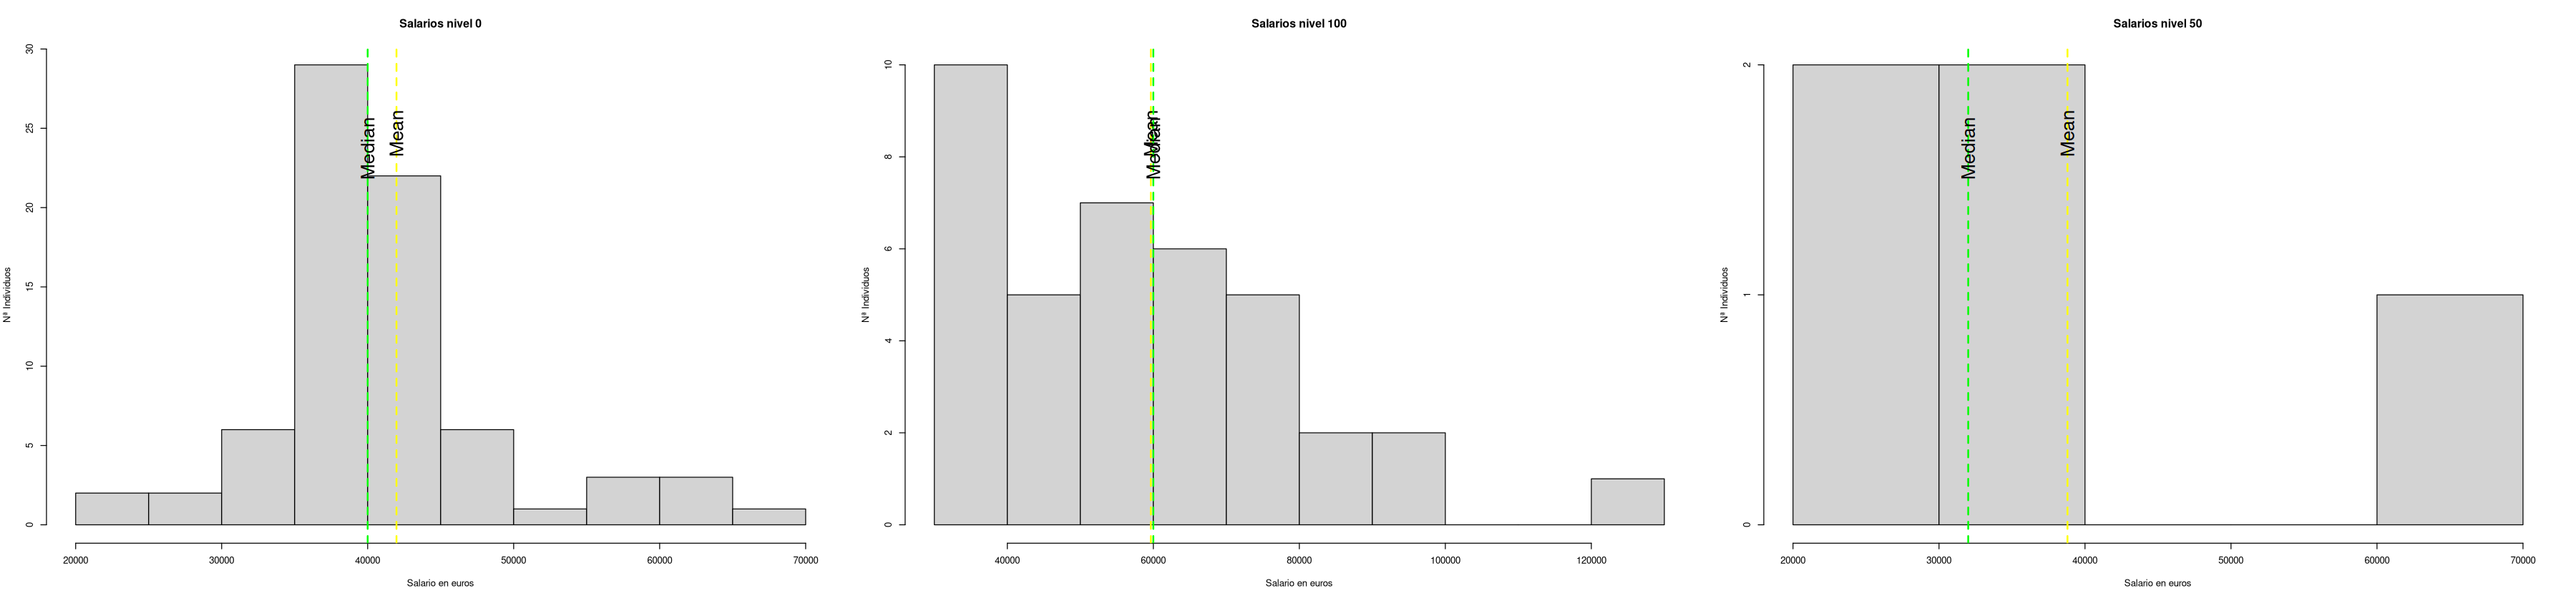

In [72]:
par(mfrow = c(1, 3))
options(repr.plot.width=30, repr.plot.height=7)

for (i in c(3, 1, 2)){
    
    filted.salary.es <- salarios_ESP[salarios_ESP$remote_ratio == unique(remote_ratio)[i], 5]
    mean.filted.salary.es <- mean(filted.salary.es)
    median.filted.salary.es <- median(filted.salary.es)
    
    histograma <- hist(filted.salary.es, main = paste0('Salarios nivel ', unique(remote_ratio)[i]), ylab = 'Nª Individuos', xlab = 'Salario en euros')
    max_y <- max(histograma$counts)

    
    abline(v = mean.filted.salary.es, col = 'yellow', lwd = 2, lty = 2)
    text(x = mean.filted.salary.es, y =max_y*0.8, col = 'black', cex = 2, srt = 90, adj = 0, labels = 'Mean', )
    abline(v = median.filted.salary.es, col = 'green', lwd = 2, lty = 2)
    text(x = median.filted.salary.es, y =max_y*0.75, col = 'black', cex = 2, srt = 90, adj = 0, labels = 'Median', )

    }


Otro ejemplo puede ser si trabajan en remoto o no. 

Tan solo tenemos dos datos de trabajos parciales, lo cual no nos ayuda mucho, y presentan un dato atipico. 

Dentro de los puestos en remoto y presenciales, vemos que la media y la mediana estan muy juntas.
Vemos como los puestos en remoto tienen un salario mayor a los puestos en local, de todas maneras era interesante saber que nivel de experiencia predomina en cada tipo de puesto:

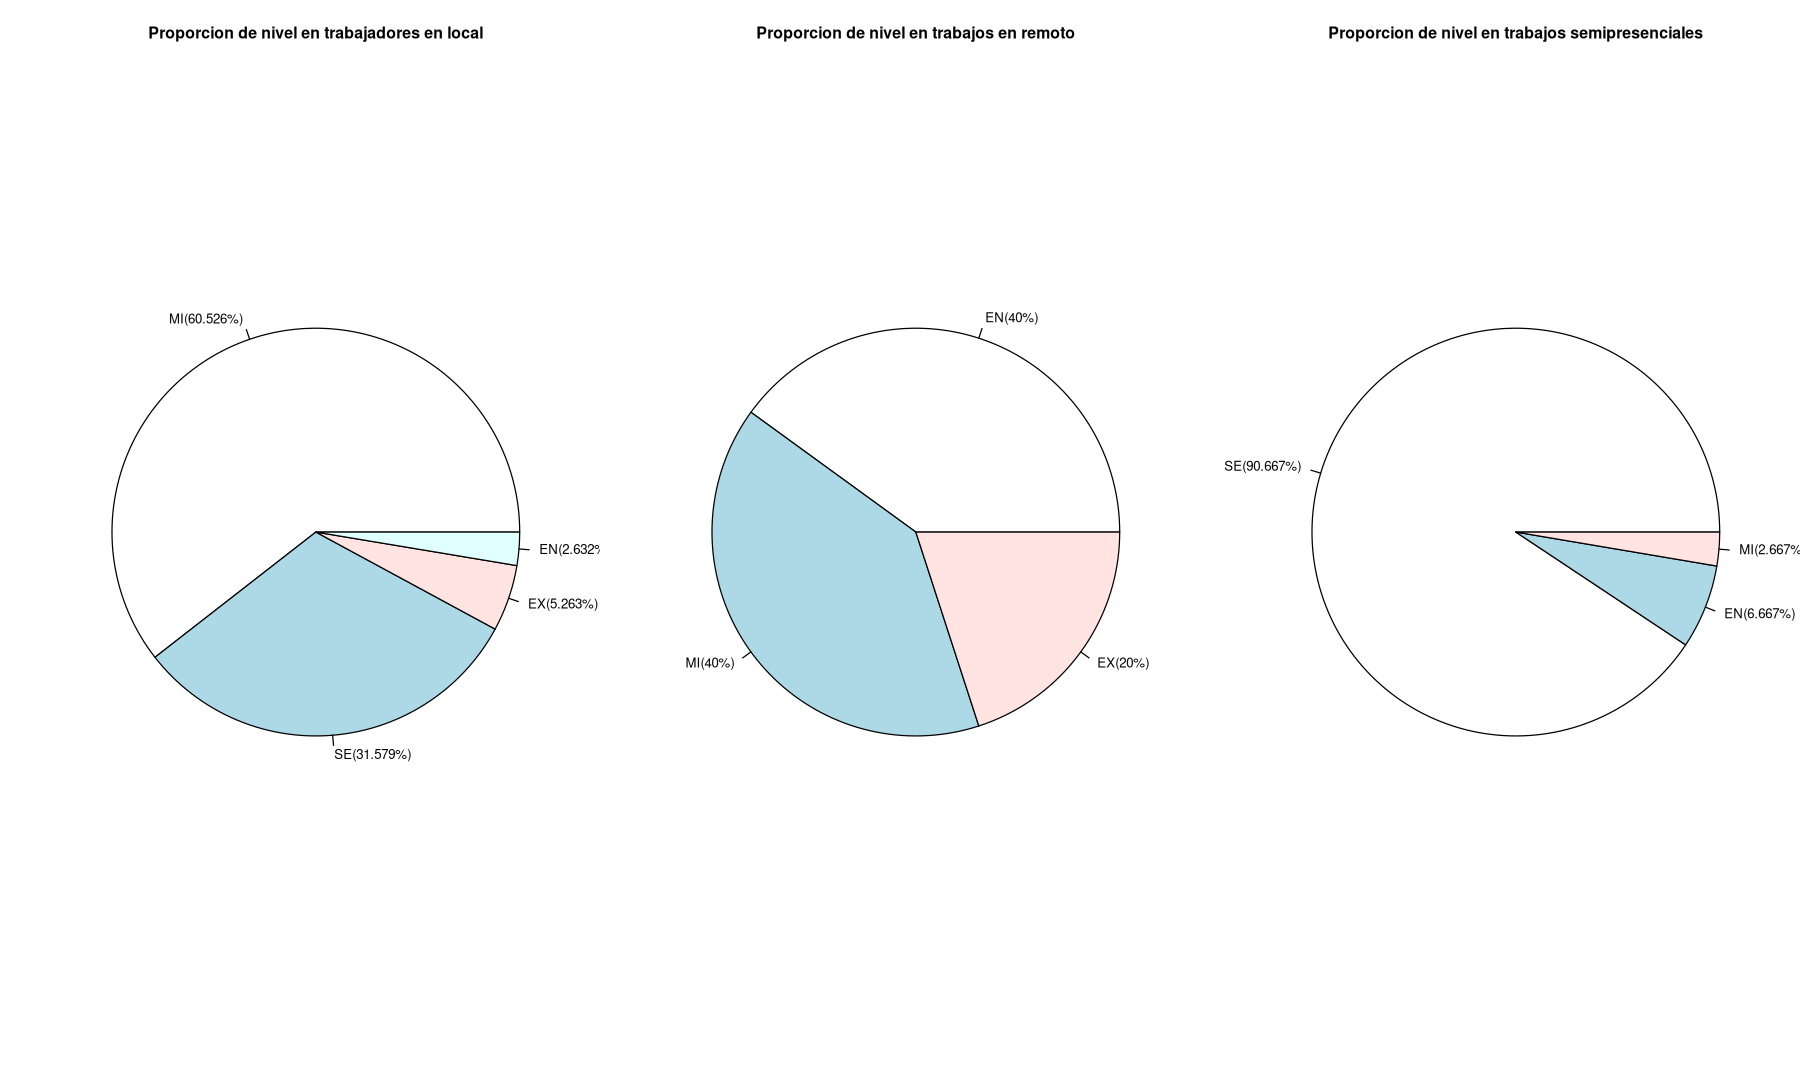

In [104]:
options(repr.plot.width=15, repr.plot.height=9)
par(mfrow = c(1, 3))

for (j in 1:3){

filte.aux.value <- sort(table(salarios_ESP[salarios_ESP$remote_ratio == unique(remote_ratio)[j], 2]), decreasing = T)
prop <- round(filte.aux.value/length(salarios_ESP[salarios_ESP$remote_ratio == unique(remote_ratio)[j], 2]), 5)
labels <- c()

for (i in 1:length(unique(salarios_ESP[salarios_ESP$remote_ratio == unique(remote_ratio)[j], 2]))) 
    {
    labels <- c(labels, paste0(names(prop)[i], '(', prop[i]*100, '%)') )
    }

if (j==2){main.aux <- 'Proporcion de nivel en trabajos en remoto'}
else if(j==3){main.aux <-'Proporcion de nivel en trabajos semipresenciales'}
else {main.aux <-'Proporcion de nivel en trabajadores en local'}
    
pie(filte.aux.value, labels = labels, radius = 1.8, main = main.aux)
}

Como era de esperar, dentro de los trabajos presenciales dominan los MI y SE.
Por otro lado, vemos que en remoto, dominan los SE, pero lo que llama la atencion es que no haya trabajadores EX.
Para terminar, dentro del trabajos semipresenciales, vemos que de los 5 datos que hay 2 son MI y En, lo que llama la atencion (los EN). Tambien vemos que hay un EX. Esto nos da mayor facilidad para interpretar el histograma anterior, ya que, los dos salarios concentrados entre los 20-30k, podrian ser de EN, los conentrados entre 30-40k de MI y el atipico entre 60-70k seria un EX.